In [1]:
#W poniższym notatniku użyto tylko 'pandas'
import pandas as pd
data = pd.read_csv('Terror.csv', encoding='ISO-8859-1', low_memory=False)


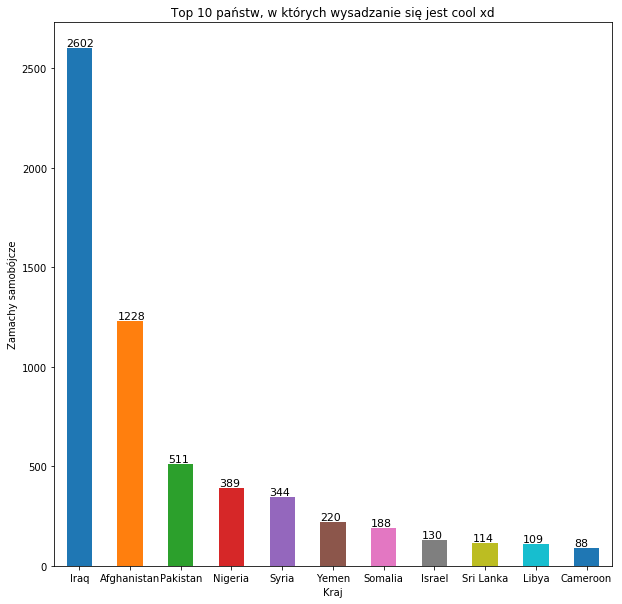

In [7]:
#Top 10 krajów, gdzie dokonano najwięcej zamachów samobójczych
df4 = data.groupby(['country_txt'])['suicide'].sum().reset_index()
df5 = df4.sort_values(by = ['suicide'], ascending = False).reset_index()
df6 = df5.loc[0:10, ['country_txt', 'suicide']]
df6 = df6.plot.bar(x='country_txt', y='suicide', legend = False, rot=0, figsize = (10,10), title="Top 10 państw, w których wysadzanie się jest cool")
df6.set_xlabel("Kraj")
df6.set_ylabel("Zamachy samobójcze")
for i in df6.patches:
    df6.text(i.get_x(), i.get_height()+10, \
            str(round((i.get_height()), 2)), fontsize=11,
                color='black')




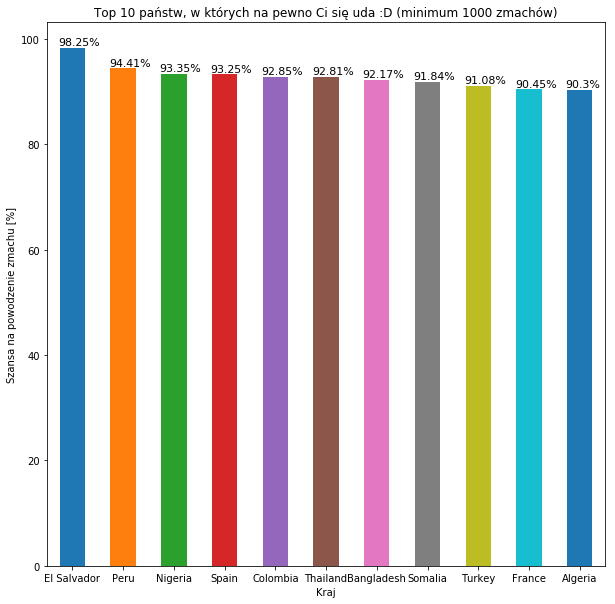

In [8]:
#Top 10 państw z największym prawdopodobieństwem powodzenia 
df21 = data.groupby(['country_txt'])['success'].sum().reset_index()
df20 = df21.sort_values(by = ['success'], ascending = False).reset_index()
df22 = df20[df20['success'] > 1000]
df23 = data['country_txt'].value_counts().tolist()
df24= df23[0:34]
df25 = df22['success']/df24
df25 = df25 * 100
df26 = {'country_txt': df22['country_txt'], 'success %': df25}
df27 = pd.DataFrame(data = df26)
df28 = df27.sort_values(by = ['success %'], ascending = False).reset_index()
df29 = df28.loc[0:10, ['country_txt', 'success %']]
df295 = df29.plot.bar(x='country_txt', y='success %', legend = False, rot=0, figsize = (10,10), title="Top 10 państw, w których na pewno Ci się uda :D (minimum 1000 zmachów)")
df295.set_xlabel("Kraj")
df295.set_ylabel("Szansa na powodzenie zmachu [%]")
for i in df295.patches:
    df295.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()), 2))+'%', fontsize=11,
                color='black')


AxesSubplot(0.125,0.125;0.775x0.755)


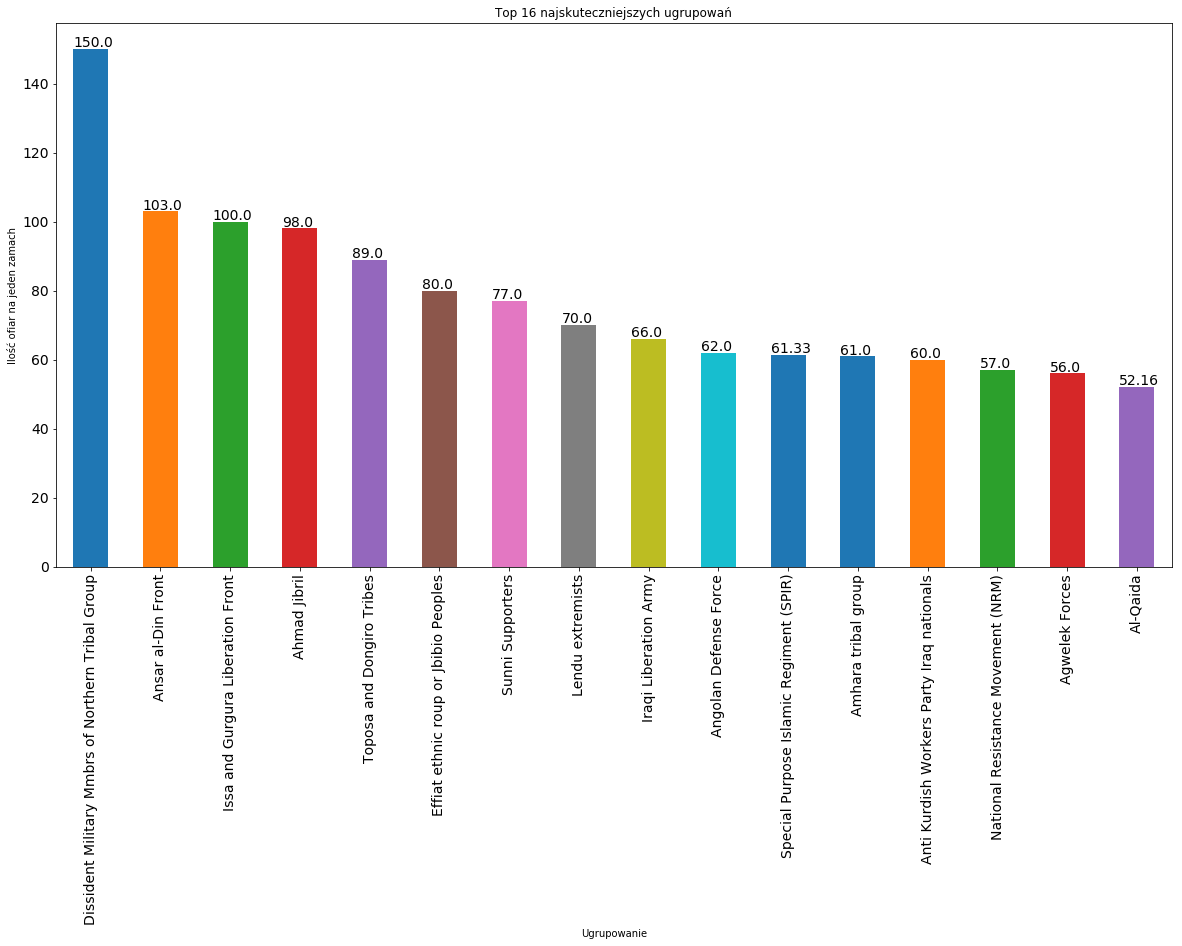

In [4]:
#Najskuteczniejsze ugrupowania
df30 = data['gname'].value_counts().tolist()
df301 = data['gname'].value_counts().index
df31 = {'gname': df301, 'attacks': df30}
df31 = pd.DataFrame(data = df31)
df31 = df31.sort_values(by = ['gname']).reset_index()
df32 = data.groupby(['gname'])['nkill'].sum().reset_index()
df32 = df32.sort_values(by = ['gname']).reset_index()
df33 = df32['nkill']/df31['attacks']
df34 = {'gname' : df32['gname'], 'kill' : df33}
df34 = pd.DataFrame(data = df34)
df34 = df34.sort_values(by = ['kill'], ascending = False).reset_index()
df34 = df34.loc[0:15, ['gname','kill']]
df34 = df34.plot.bar(x='gname', y='kill', fontsize=14, legend = False, figsize = (20,10), title="Top 16 najskuteczniejszych ugrupowań")
df34.set_xlabel("Ugrupowanie")
df34.set_ylabel("Ilość ofiar na jeden zamach")
for i in df34.patches:
    df34.text(i.get_x(), i.get_height()+.5, \
            str(round((i.get_height()), 2)), fontsize=14,
                color='black')
    

In [19]:
#Sprawdz ile osób zgineło w Twoje urodziny!
##imnoth wpisz miesiac, iday wpisz dzień, iyear wpisz rok
df40 = ((data['imonth']==4)& (data['iday']==8) & (data['iyear']==1995))
df40 = data[(df40==True)]['nkill'].sum()
print ("Tyle osób zgineło w moje urodziny =", df40)

Tyle osób zgineło w moje urodziny = 27.0


In [6]:
#Jaki region taka ulubiona broń zamachowcy
df50 = data['region_txt'].value_counts().reset_index()
df50 = df50.sort_values(by='index').reset_index()
df51 = data.groupby(['region_txt']).apply(lambda x: x['weapsubtype1_txt'].value_counts().index[0]).reset_index()
df52 = {'Region': df50['index'], 'Attacks count': df50['region_txt'], 'Favourite weapon': df51[0]}
df53 = pd.DataFrame(data = df52)
df53 = df53.sort_values(by = 'Attacks count', ascending = False)
df53.style


,Region,Attacks count,Favourite weapon
5,Middle East & North Africa,50474,Unknown Explosive Type
8,South Asia,44974,Unknown Gun Type
7,South America,18978,Unknown Explosive Type
10,Sub-Saharan Africa,17550,Unknown Gun Type
11,Western Europe,16639,Unknown Explosive Type
9,Southeast Asia,12485,Unknown Gun Type
1,Central America & Caribbean,10344,Automatic or Semi-Automatic Rifle
4,Eastern Europe,5144,"Projectile (rockets, mortars, RPGs, etc.)"
6,North America,3456,Unknown Explosive Type
3,East Asia,802,Unknown Explosive Type
